In [1]:
import pandas as pd
import tensorflow as tf
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

# 한글처리 지원
plt_settings()

2023-09-29 08:54:31.412803: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_X = read_data('2a-all-scaled-X2', process_seq='4th')
df_y = read_data('2a-all-y2', process_seq='4th')

training_columns = df_X.columns

In [3]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.2)

In [4]:
model_mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1:])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_mlp.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               19072     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29441 (115.00 KB)
Trainable params: 29441 (115.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-09-29 08:54:33.221660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-29 08:54:33.225747: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-29 08:54:33.225902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
history = model_mlp.fit(
    X_train, y_train, 
    epochs=100, verbose=2, validation_split=0.2
)

Epoch 1/100


2023-09-29 08:54:34.787499: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1c01f350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-29 08:54:34.787520: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2023-09-29 08:54:34.791866: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-29 08:54:34.933360: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-09-29 08:54:34.976563: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-29 08:54:35.022273: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


81/81 - 2s - loss: 51043295559680.0000 - mae: 6256957.0000 - val_loss: 53222425231360.0000 - val_mae: 6307401.5000 - 2s/epoch - 24ms/step
Epoch 2/100
81/81 - 0s - loss: 50991290384384.0000 - mae: 6253858.5000 - val_loss: 53068552994816.0000 - val_mae: 6298552.0000 - 195ms/epoch - 2ms/step
Epoch 3/100
81/81 - 0s - loss: 50548044726272.0000 - mae: 6228361.5000 - val_loss: 52175422095360.0000 - val_mae: 6247494.0000 - 189ms/epoch - 2ms/step
Epoch 4/100
81/81 - 0s - loss: 48810860478464.0000 - mae: 6127839.5000 - val_loss: 49320690712576.0000 - val_mae: 6081202.0000 - 193ms/epoch - 2ms/step
Epoch 5/100
81/81 - 0s - loss: 44589553549312.0000 - mae: 5869085.5000 - val_loss: 43483561721856.0000 - val_mae: 5713263.0000 - 189ms/epoch - 2ms/step
Epoch 6/100
81/81 - 0s - loss: 37393159684096.0000 - mae: 5376448.0000 - val_loss: 35037554671616.0000 - val_mae: 5085220.5000 - 188ms/epoch - 2ms/step
Epoch 7/100
81/81 - 0s - loss: 28562180538368.0000 - mae: 4622603.0000 - val_loss: 26389862416384.0000

In [6]:
model_mlp.evaluate(X_test, y_test, verbose=0)

[2760836382720.0, 1000331.3125]

In [7]:
pred_mlp = model_mlp.predict(X_test, verbose=0)
_ = regression_evaluation(y_test, pred_mlp)

R2_SCORE: 0.766290, MAPE: 14.892277, MSE: 2760836018371.120605, RMSE: 1661576.365495, MAE: 1000331.358501


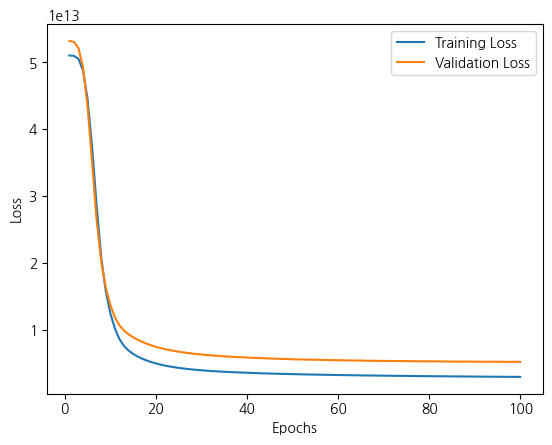

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# loss와 val_loss 값을 그래프로 그립니다.
epochs_range = range(1, len(loss) + 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

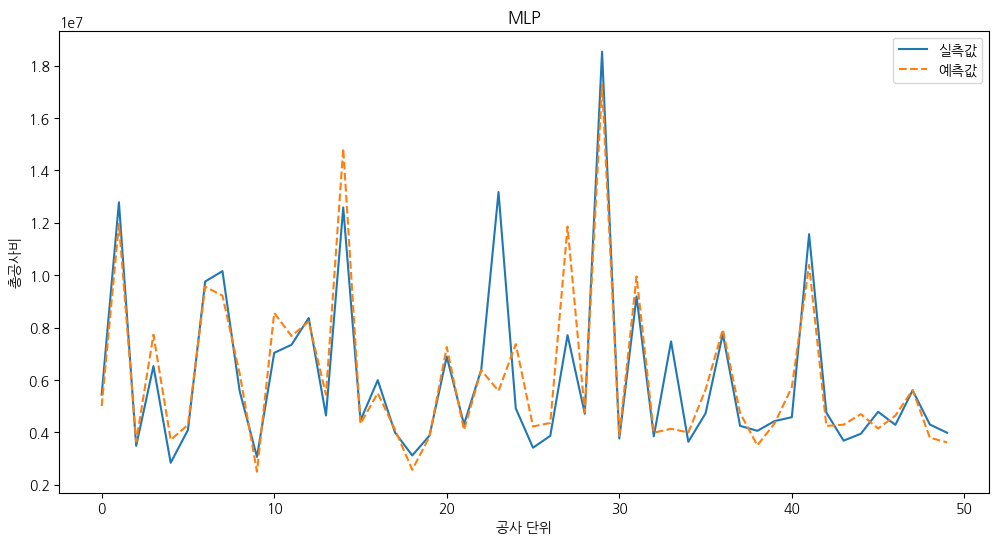

: 

In [12]:
display_start=50
display_size=50

plot_actual_pred(
    y_test[display_start:display_start+display_size],
    pred_mlp[display_start:display_start+display_size],
    'MLP'
)